In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import warnings
warnings.filterwarnings('ignore')

print('슝=3')

슝=3


# 시계열 데이터 생성

In [2]:
dataset_filepath = os.getenv('HOME')+'/aiffel/stock_prediction/data/daily-min-temperatures.csv' 
df = pd.read_csv(dataset_filepath) 
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [3]:
# 이번에는 Date를 index_col로 지정해 주었습니다. 
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [4]:
ts1 = df['Temp']  # 우선은 데이터 확인용이니 time series 의 이니셜을 따서 'ts'라고 이름 붙여줍시다!
print(type(ts1))
ts1.head()

<class 'pandas.core.series.Series'>


Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Temp, dtype: float64

# 시계열 안정성의 정성적 분석

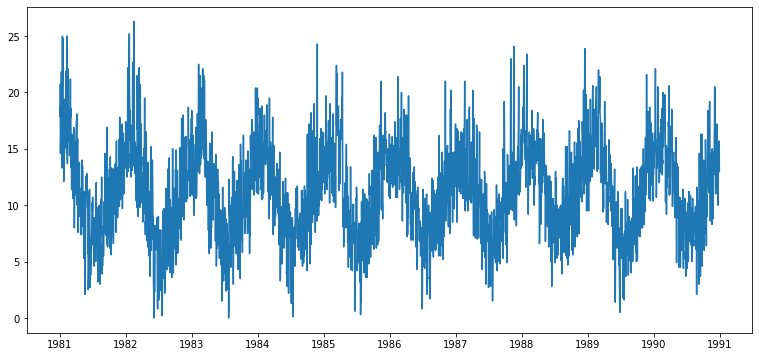

In [5]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 13, 6    # matlab 차트의 기본 크기를 13, 6으로 지정해 줍니다.

# 시계열(time series) 데이터를 차트로 그려 봅시다. 특별히 더 가공하지 않아도 잘 그려집니다.
plt.plot(ts1)

In [6]:
ts1[ts1.isna()]  # 시계열(Time Series)에서 결측치가 있는 부분만 Series로 출력합니다.

Series([], Name: Temp, dtype: float64)

## 결측치를 확인하고 보간하기

- 결측치가 있는 데이터를 모두 삭제(drop)


- 결측치 양옆의 값들을 이용해서 적절히 보간(interpolate)하여 대입

Series([], Name: Temp, dtype: float64)


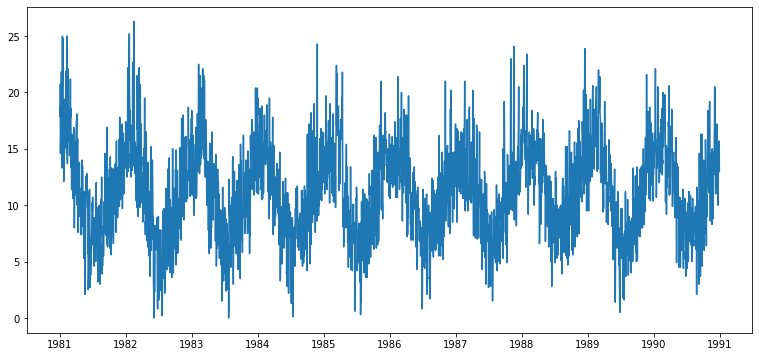

In [7]:
# 결측치가 있다면 이를 보간합니다. 보간 기준은 time을 선택합니다. 
ts1=ts1.interpolate(method='time')

# 보간 이후 결측치(NaN) 유무를 다시 확인합니다.
print(ts1[ts1.isna()])

# 다시 그래프를 확인해봅시다!
plt.plot(ts1)

아래는 일정 시간 내 구간 통계치(Rolling Statistics)를 시각화해 보는 함수입니다.

현재 타임 스텝 부터 window에 주어진 타임 스텝 이전 사이

구간의 평균(rolling mean, 이동평균)과
표준편차(rolling std, 이동표준편차)를
원본 시계열과 함께 시각화해 보면 좀 더 뚜렷한 경향성을 확인할 수 있을 것입니다.

In [8]:
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 시계열

     # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화해 본다.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
print('슝=3')

슝=3


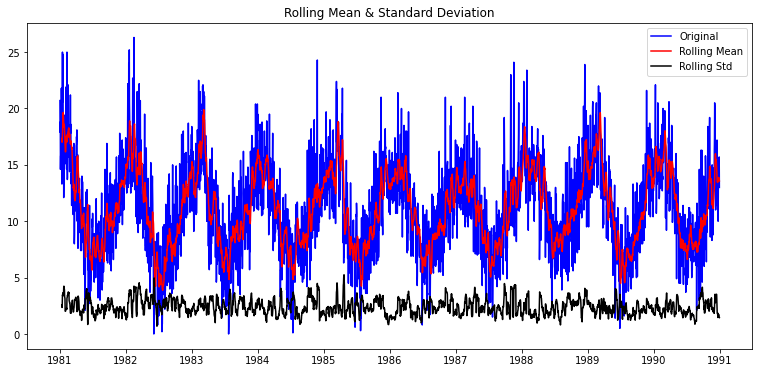

In [9]:
plot_rolling_statistics(ts1, window=12)

이번에는 International airline passengers 데이터셋입니다. 월별 항공 승객 수(천명 단위)의 시계열 데이터인데 기온 변화 데이터셋과는 좀 다른 패턴이 나타나지 않을까요? 위와 동일한 방법으로 분석해 보겠습니다.

In [11]:
dataset_filepath = os.getenv('HOME')+'/aiffel/stock_prediction/data/airline-passengers.csv' 
df = pd.read_csv(dataset_filepath, index_col='Month', parse_dates=True).fillna(0)  
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


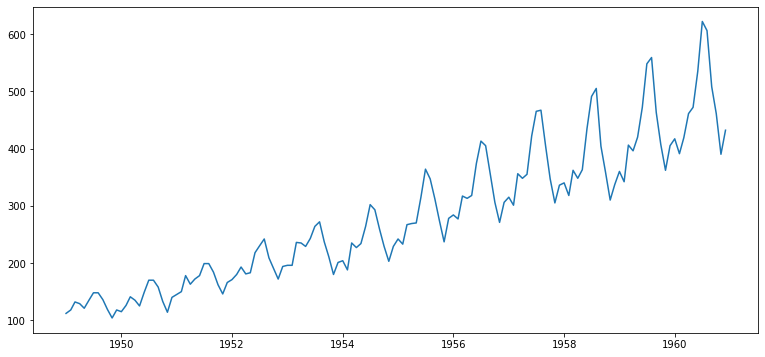

In [12]:
ts2 = df['Passengers']
plt.plot(ts2)

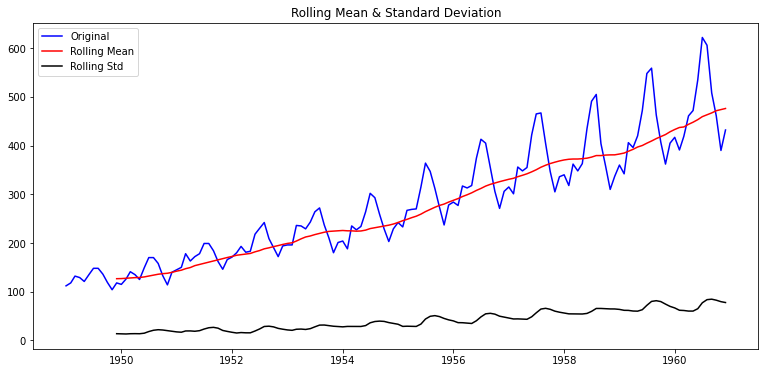

In [18]:
plot_rolling_statistics(ts2, window=12)

이렇게 시간의 추이에 따라 평균과 분산이 증가하는 패턴을 보인다면, <br>
이 시계열 데이터는 적어도 안정적이진 않다고 정성적인 결론을 내려볼 수 있을 것 같습니다. 

위와 같이 우리는 시계열 데이터의 안정성을 시각화 방법을 통해 정성적으로 분석해 보았습니다. 이것은 시계열 데이터를 다루는 가장 기본적인 접근법이라 할 수 있습니다.

 ### Augmented Dickey-Fuller Test(ADF Test) 라는 시계열 데이터의 안정성(stationary)을 테스트하는 통계적 방법

1. 주어진 시계열 데이터가 안정적이지 않다라는 귀무가설(Null Hypothesis)를 세운 후,


2. 통계적 가설 검정 과정을 통해 이 귀무가설이 기각될 경우에


3. 이 시계열 데이터가 안정적이다라는 대립가설(Alternative Hypothesis)을 채택한다

귀무가설, 대립가설, p-value 이란?

우리가 일반적으로 생각하는 가설은 아마 다음과 같을 수 있습니다. “지구는 둥글 것이다." 또는 “태양이 지구를 돌 것이다.” 하지만 통계적 가설 검정은 어떠한 큰 이론을 제안하는 가설이 아닙니다. 통계에서 가설은 우리가 알고 싶어 하는 “어떤 모집단의 모수(예: 평균, 분산, 등)에 대한 잠정적인 주장"입니다. 따라서 통계적 가설은 앞서 예를 든 가설들과는 다르게 일정한 형식을 따라야 합니다.

그 형식이 바로 “ 귀무가설( Null hypothesis:H0)” 과 “ 대립가설( Alternative hypothesis:H1)” 입니다. 통계적 가설 검정을 하려면 우선 두 가지 형식적 가설 (귀무가설 과 대립가설)을 설정해야 합니다. 그리고 어떤 가설을 채택을 할지를 확률적으로 따져보고 둘 중 하나를 채택합니다. 그러면 귀무가설은 무엇이고 대립가설은 무엇일까요?

귀무 가설은 통계학에서 처음부터 버릴 것을 예상하는 가설이다. 차이가 없거나 의미있는 차이가 없는 경우의 가설이며 이것이 맞거나 맞지 않다는 통계학적 증거를 통해 증명하려는 가설입니다. 쉽게 말하면 “모집단의 모수는 00와 같다.” 또는 “ 모집단의 모수는 00와 차이가 없다.” 라고 가정하는 것을 말합니다. 예를 들면 1) 만약 전국 남학생의 평균 키가 170cm라는 주장을 통계적으로 검정한다면, 이에 대한 귀무 가설은 “전국 남학생의 평균 키는 170cm과 같다.(또는 차이가 없다.)”가 될 것입니다. 2)제약 회사에서 개발한 백신의 효과를 검정한다면, 귀무가설은 “개발한 백신은 효과가 없다.(또는 차이가 없다).” 가 됩니다. 즉 귀무가설은 “~와 차이가 없다.” “~의 효과가 없다.” “~와 같다.” 라는 형식으로 설정된다는 것을 알 수 있습니다.

대립가설의 정의는 “귀무가설이 거짓이라면 대안적으로 참이 되는 가설" 입니다. 쉽게 설명하면 “귀무가설이 틀렸다고 판단했을 때(기각되었을 때), 대안적으로 선택하는(채택되는) 가설"을 말합니다. 다시 예로 설명드리면 대립가설은 “모집단의 모수는 00와 다르다.” 또는 “ 모집단의 모수는 00와 차이가 있다.” 라고 가정하는 것을 말합니다. 예를 들면 1) 만약 전국 남학생의 평균 키가 170cm라는 주장을 통계적으로 검정한다면, 이에 대한 대립 가설은 “전국 남학생의 평균 키는 170cm와 다르다.(또는 차이가 있다.)”가 될 것이고, 2)제약 회사에서 개발한 백신의 효과를 검정한다면, 대립가설은 “개발한 백신은 효과가 있다.(또는 차이가 있다).” 가 됩니다. 즉 대립가설은 “~와 차이가 있다.” “~의 효과는 있다.” “~와 다르다.” 라는 형식으로 설정된다는 것을 알 수 있습니다.

p-value 정의는 “귀무가설이 참이라고 가정했을 때, 표본으로 얻어지는 통계치(예: 표본 평균)가 나타날 확률" 입니다. p값이 낮다는 것은 귀무가설이 참이라는 가정 하에서 표본을 추출했을 때, 이런 표본 평균이 관측될 확률이 낮다는 것을 뜻합니다. 즉 p 값이 매우 낮으면, 이러한 표본 통계량은 우연히 나타나기 어려운 케이스이기 때문에, 우리는 귀무가설을 채택하지 않고(기각하고), 대안적인 가설, 즉 대립가설을 채택하게 됩니다.

In [19]:
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # statsmodels 패키지에서 제공하는 adfuller 메서드를 호출합니다.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller 메서드가 리턴한 결과를 정리하여 출력합니다.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    
print('슝=3')

슝=3


아래는 statsmodels 패키지에서 제공하는 adfuller 메서드를 이용해 주어진 timeseries에 대한 Augmented Dickey-Fuller Test를 수행하는 코드입니다.

그럼 이전 스텝에서 정성적으로 분석해 보았던 두 시계열(Time Series)에 대한 Augmented Dickey-Fuller Test를 수행해 봅시다.

ts1(Daily Minimum Temperatures in Melbourne)시계열이 안정적이지 않다는 귀무가설은 p-value가 거의 0에 가깝게 나타났습니다.

따라서 이 귀무가설은 기각되고, 이 시계열은 안정적 시계열이라는 대립가설이 채택됩니다.

In [20]:
augmented_dickey_fuller_test(ts1)

Results of Dickey-Fuller Test:
Test Statistic                   -4.444805
p-value                           0.000247
#Lags Used                       20.000000
Number of Observations Used    3629.000000
Critical Value (1%)              -3.432153
Critical Value (5%)              -2.862337
Critical Value (10%)             -2.567194
dtype: float64


In [21]:
augmented_dickey_fuller_test(ts2)

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


ts2(International airline passengers) 시계열이 안정적이지 않다는 귀무가설은 p-value가 거의 1에 가깝게 나타났습니다.

p-value가 1에 가깝다는 것이 이 귀무가설(주어진 시계열 데이터가 안정적이지 않다.) 이 옳다는 직접적인 증거는 아닙니다.

하지만 이 귀무가설을 기각할 수는 없게 되었으므로 이 시계열이 안정적인 시계열이라고 말할 수는 없습니다.

- 정성적인 분석을 통해 보다 안정적(starionary)인 특성을 가지도록 기존의 시계열 데이터를 가공/변형하는 시도


- 시계열 분해(Time series decomposition) 기법을 적용

1-1. 로그함수 변환
가장 먼저 고려해 볼 수 있는 것은 시간 추이에 따라 분산이 점점 커지고 있다는 점입니다. 시계열이 이런 특성을 보일 경우에는 로그함수로 변환을 해주는 것이 도움이 됩니다.

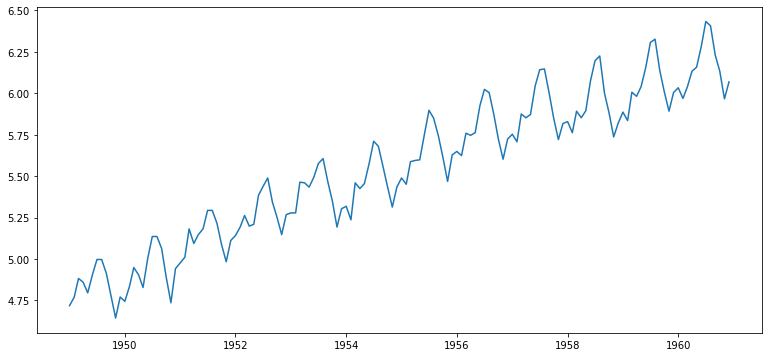

In [22]:
ts_log = np.log(ts2)
plt.plot(ts_log)

In [23]:
augmented_dickey_fuller_test(ts_log)

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


p-value가 0.42로 무려 절반 이상 줄어들었습니다. 정성적으로도 시간 추이에 따른 분산이 일정해진 것을 확인할 수 있습니다. 아주 효과적인 변환이었던 것 같습니다. 하지만 아직은 갈 길이 멉니다. 가장 두드러지는 문제점은 시간 추이에 따라 평균이 계속 증가한다는 점입니다.

1-2. Moving average 제거 - 추세(Trend) 상쇄하기
시계열 분석에서 위와 같이 시간 추이에 따라 나타나는 평균값 변화를 추세(trend)라고 합니다. 이 변화량을 제거해 주려면 거꾸로 Moving Average, 즉 rolling mean을 구해서 ts_log에서 빼주면 어떨까요?

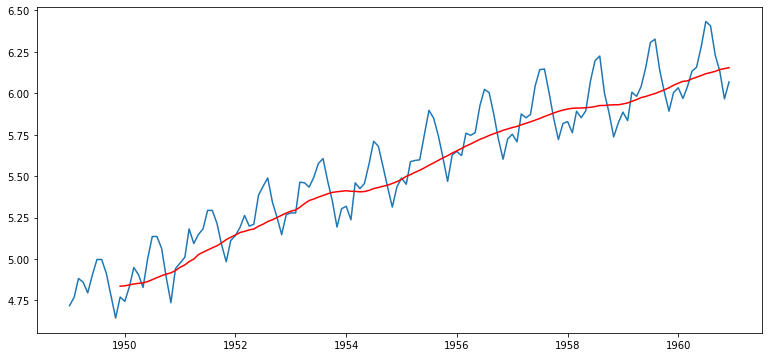

In [24]:
moving_avg = ts_log.rolling(window=12).mean()  # moving average구하기 
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [25]:
ts_log_moving_avg = ts_log - moving_avg # 변화량 제거
ts_log_moving_avg.head(15)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
Name: Passengers, dtype: float64

우리가 관심을 가진 ts_log_moving_avg에 거의 도달했습니다. 그런데 문제는 Moving Average 계산 시 (windows size=12인 경우) 앞의 11개의 데이터는 Moving Average가 계산되지 않으므로 ts_log_moving_avg에 결측치(NaN)가 발생한다는 점입니다.
이 결측치들은 향후 Dicky-Fuller Test 시에 에러를 발생시킬 것이므로 이를 데이터셋에서 제거해 줍니다.

In [26]:
ts_log_moving_avg.dropna(inplace=True)
ts_log_moving_avg.head(15)

Month
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
1950-05-01   -0.027529
1950-06-01    0.139881
1950-07-01    0.260184
1950-08-01    0.248635
1950-09-01    0.162937
1950-10-01   -0.018578
1950-11-01   -0.180379
1950-12-01    0.010818
1951-01-01    0.026593
1951-02-01    0.045965
Name: Passengers, dtype: float64

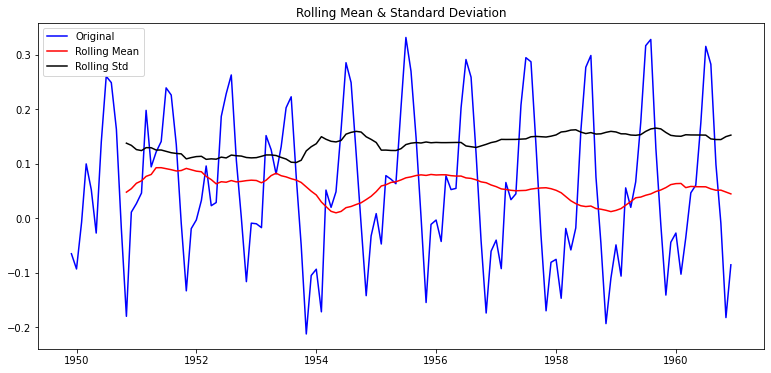

In [27]:
plot_rolling_statistics(ts_log_moving_avg)

In [28]:
augmented_dickey_fuller_test(ts_log_moving_avg)

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


드디어 p-value가 0.02 수준이 되었습니다. 95% 이상의 confidence로 이 time series는 stationary하다고 할 수 있겠습니다.

그러나 지금까지의 접근에서 한 가지 숨겨진 문제점이 있습니다.
바로 Moving Average를 계산하는 window=12로 정확하게 지정해 주어야 한다는 점입니다.

만약 위 코드에서 window=6을 적용하면 어떤 결과가 나올까요?

In [29]:
moving_avg_6 = ts_log.rolling(window=6).mean()
ts_log_moving_avg_6 = ts_log - moving_avg_6
ts_log_moving_avg_6.dropna(inplace=True)
print('슝=3')

슝=3


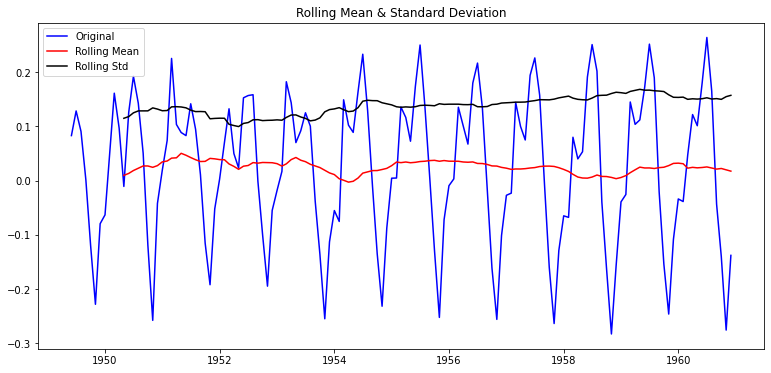

In [30]:
plot_rolling_statistics(ts_log_moving_avg_6)

In [31]:
augmented_dickey_fuller_test(ts_log_moving_avg_6)

Results of Dickey-Fuller Test:
Test Statistic                  -2.273822
p-value                          0.180550
#Lags Used                      14.000000
Number of Observations Used    124.000000
Critical Value (1%)             -3.484220
Critical Value (5%)             -2.885145
Critical Value (10%)            -2.579359
dtype: float64


그래프를 정성적으로 분석해서는 window=12일 때와 별 차이를 느낄 수 없지만 Augmented Dickey-Fuller Test의 결과 p-value는 0.18 수준이어서 아직도 안정적 시계열이라고 말할 수 없게 되었습니다.

이 데이터셋은 월 단위로 발생하는 시계열이므로 12개월 단위로 주기성이 있기 때문에 window=12가 적당하다는 것을 추측할 수도 있을 것 같습니다만, moving average를 고려할 때는 rolling mean을 구하기 위한 window 크기를 결정하는 것이 매우 중요하다는 것을 기억해 둡시다.

이제 시간의 추이에 따라 평균이 증가하는 trend를 제거하였습니다. 그러나 여전히 안정적인 시계열이라고 하기에는 마음에 걸리는 부분이 있습니다.

1-3. 차분(Differencing) - 계절성(Seasonality) 상쇄하기
Trend에는 잡히지 않지만 시계열 데이터 안에 포함된 패턴이 파악되지 않은 주기적 변화는 예측에 방해가 되는 불안정성 요소입니다. 이것은 Moving Average 제거로는 상쇄되지 않는 효과입니다. 이런 계절적, 주기적 패턴을 계절성(Seasonality)라고 합니다.

- 시계열 패턴

이런 패턴을 상쇄하기 위해 효과적인 방법에는 차분(Differencing)이 있습니다. 마치 미분(Differentiation)을 떠올리게 하는 개념인데요, 시계열을 한 스텝 앞으로 시프트한 시계열을 원래 시계열에 빼 주는 방법입니다. 이렇게 되면 남은 것은 현재 스텝 값 - 직전 스텝 값이 되어 정확히 이번 스텝에서 발생한 변화량을 의미하게 됩니다. 이 변화량 시계열은 어떤 패턴을 보이게 될까요?

우선 시프트한 시계열과 원본 시계열에 대한 그래프를 그려봅시다.

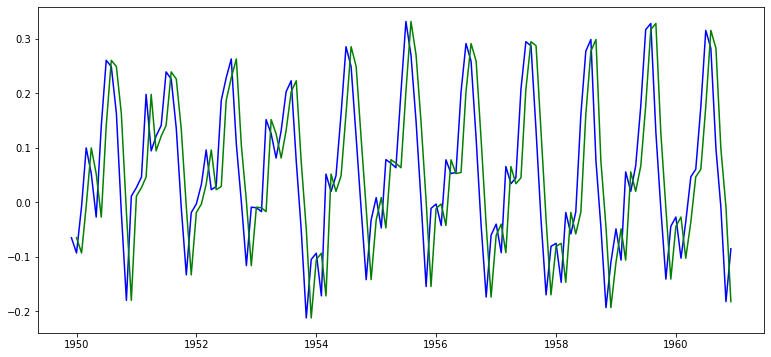

In [32]:
ts_log_moving_avg_shift = ts_log_moving_avg.shift()

plt.plot(ts_log_moving_avg, color='blue')
plt.plot(ts_log_moving_avg_shift, color='green')

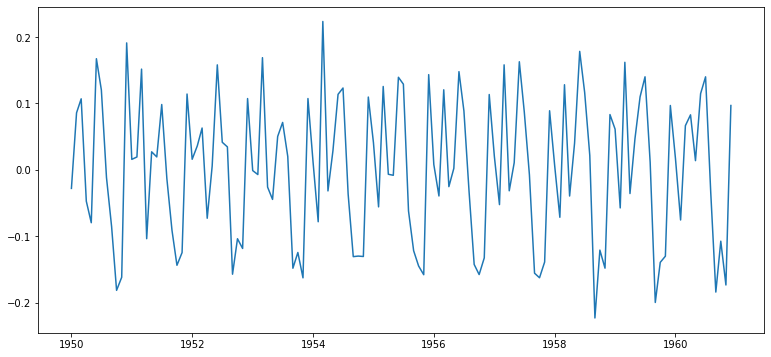

In [33]:
ts_log_moving_avg_diff = ts_log_moving_avg - ts_log_moving_avg_shift
ts_log_moving_avg_diff.dropna(inplace=True)
plt.plot(ts_log_moving_avg_diff)

이동평균과, 이동표준편차를 그래프에 나타내어 정성적으로 안정성(stationary) 여부를 파악해 봅시다.

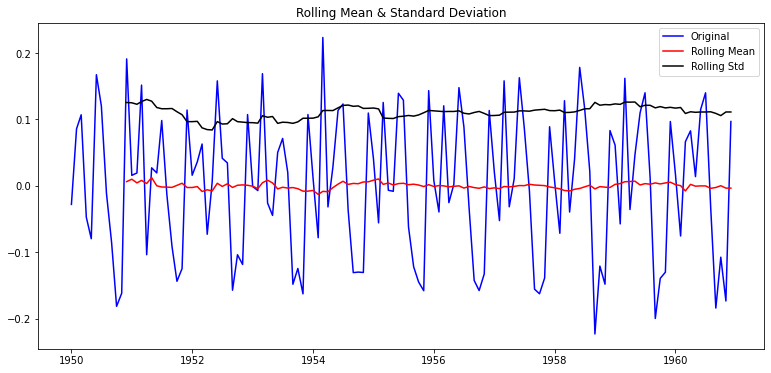

In [34]:
plot_rolling_statistics(ts_log_moving_avg_diff)

In [35]:
augmented_dickey_fuller_test(ts_log_moving_avg_diff)

Results of Dickey-Fuller Test:
Test Statistic                  -3.912981
p-value                          0.001941
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64


이동평균을 빼 주어 추세(Trend)를 제거하고 난 시계열에다가 1차 차분(1st order differencing)을 적용하여 Seasonality 효과를 다소 상쇄한 결과, p-value가 약 0.022 에서 0.0019로 1/10 정도로 줄었습니다.

데이터에 따라서는 2차 차분(2nd order differencing, 차분의 차분), 3차 차분(3rd order differencing, 2차 차분의 차분)을 적용하면 더욱 p-value를 낮출 수 있을지도 모릅니다.

# 2. 시계열 분해(Time series decomposition)

statsmodels 라이브러리 안에는 seasonal_decompose 메서드를 통해 시계열 안에 존재하는 trend, seasonality를 직접 분리해 낼 수 있는 기능이 있습니다. 이 기능을 활용하면 우리가 위에서 직접 수행했던 moving average 제거, differencing 등을 거치지 않고도 훨씬 안정적인 시계열을 분리해 낼 수 있게 됩니다. 이번에는 위에서 구했던 로그 변환 단계(ts_log)에서부터 출발해 봅시다.

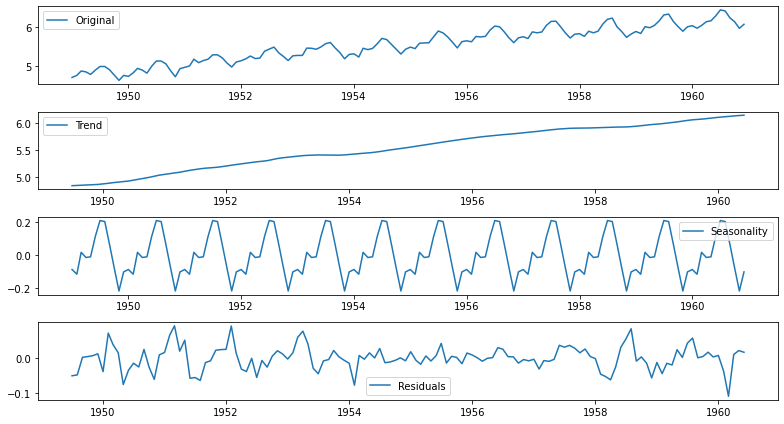

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend # 추세(시간 추이에 따라 나타나는 평균값 변화 )
seasonal = decomposition.seasonal # 계절성(패턴이 파악되지 않은 주기적 변화)
residual = decomposition.resid # 원본(로그변환한) - 추세 - 계절성

plt.rcParams["figure.figsize"] = (11,6)
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

Original 시계열에서 Trend와 Seasonality를 제거하고 난 나머지를 Residual이라고 합니다. 뒤집어서 말하면 Trend+Seasonality+Residual=Original 이 성립한다는 뜻입니다. 이러한 Decomposing은 시계열 데이터를 이해하는 중요한 관점을 제시해 줍니다.

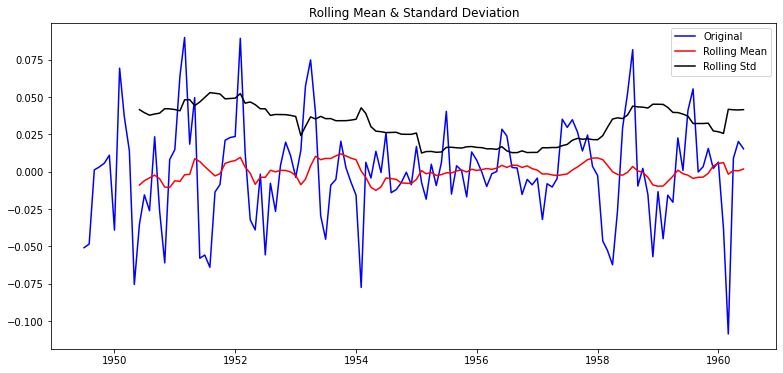

In [37]:
plt.rcParams["figure.figsize"] = (13,6)
plot_rolling_statistics(residual)

In [38]:
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


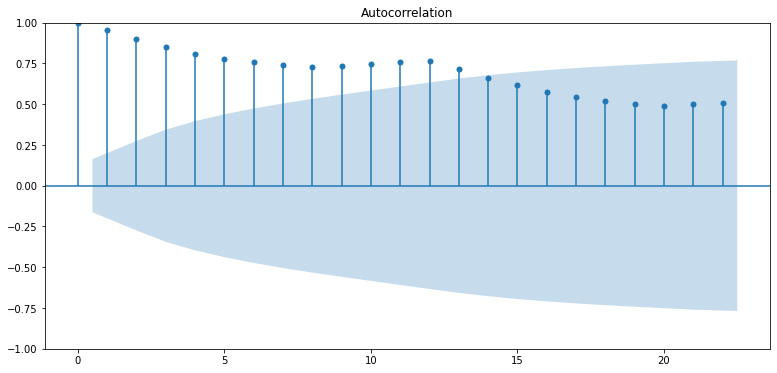

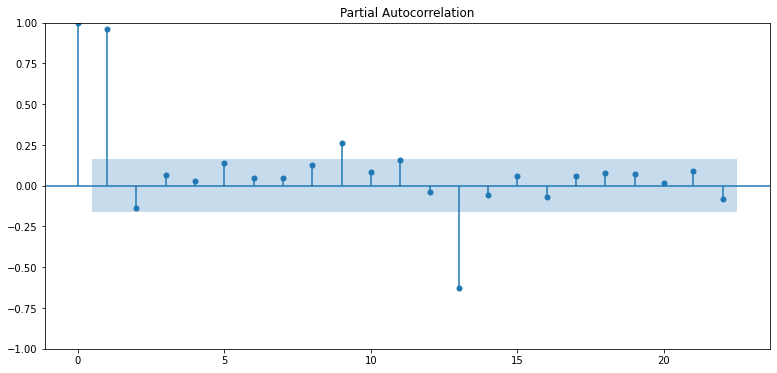

In [39]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


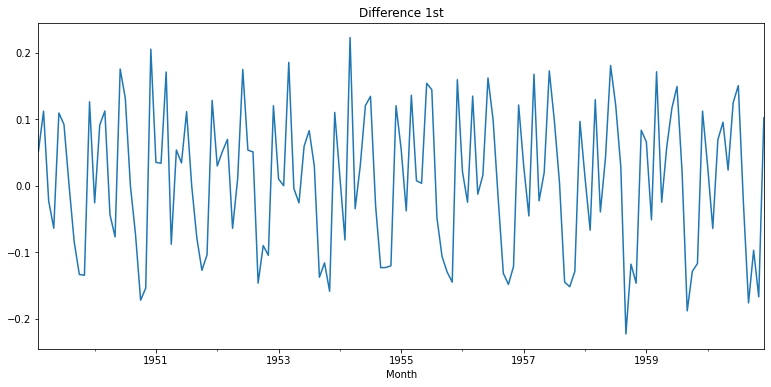

In [40]:
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

Results of Dickey-Fuller Test:
Test Statistic                -8.196629e+00
p-value                        7.419305e-13
#Lags Used                     1.300000e+01
Number of Observations Used    1.280000e+02
Critical Value (1%)           -3.482501e+00
Critical Value (5%)           -2.884398e+00
Critical Value (10%)          -2.578960e+00
dtype: float64


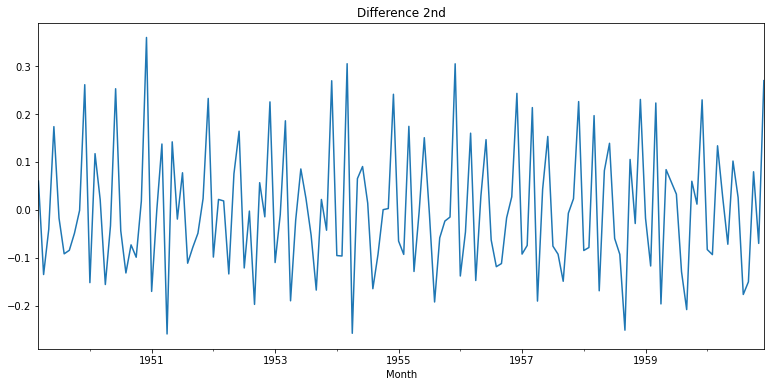

In [41]:
# 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

# 3. 학습 데이터 분리

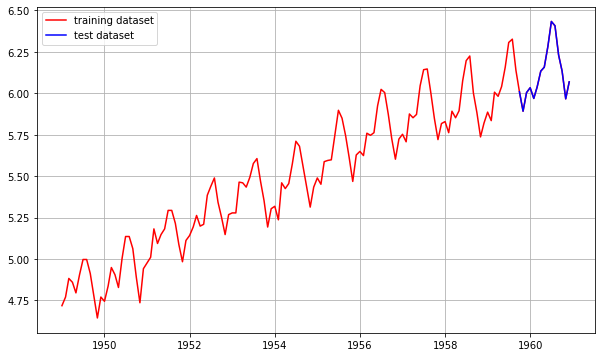

In [42]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

In [43]:
print(ts_log[:2])
print(train_data.shape)
print(test_data.shape)

Month
1949-01-01    4.718499
1949-02-01    4.770685
Name: Passengers, dtype: float64
(129,)
(15,)


In [44]:
import warnings
warnings.filterwarnings('ignore') #경고 무시

from statsmodels.tsa.arima.model import ARIMA
# Build Model
model = ARIMA(train_data, order=(14, 1, 0)) # 모수는 이전 그래프를 참고 
fitted_m = model.fit() 

print(fitted_m.summary())

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  129
Model:                ARIMA(14, 1, 0)   Log Likelihood                 219.951
Date:                Mon, 14 Feb 2022   AIC                           -409.902
Time:                        14:31:18   BIC                           -367.121
Sample:                    01-01-1949   HQIC                          -392.520
                         - 09-01-1959                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2752      0.081     -3.387      0.001      -0.434      -0.116
ar.L2         -0.0124      0.109     -0.114      0.909      -0.225       0.200
ar.L3          0.0002      0.046      0.005      0.9

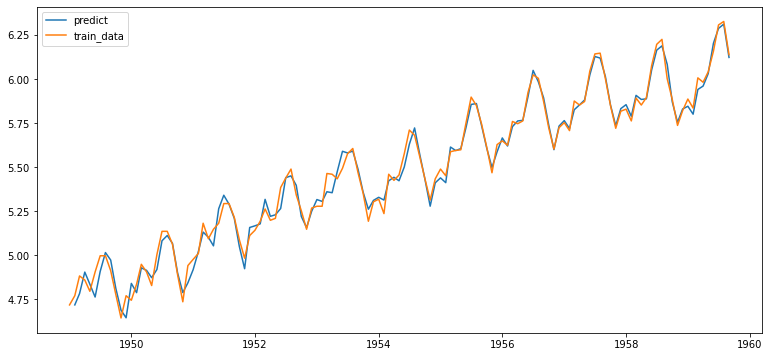

In [45]:
fitted_m = fitted_m.predict()
fitted_m = fitted_m.drop(fitted_m.index[0])
plt.plot(fitted_m, label='predict')
plt.plot(train_data, label='train_data')
plt.legend()

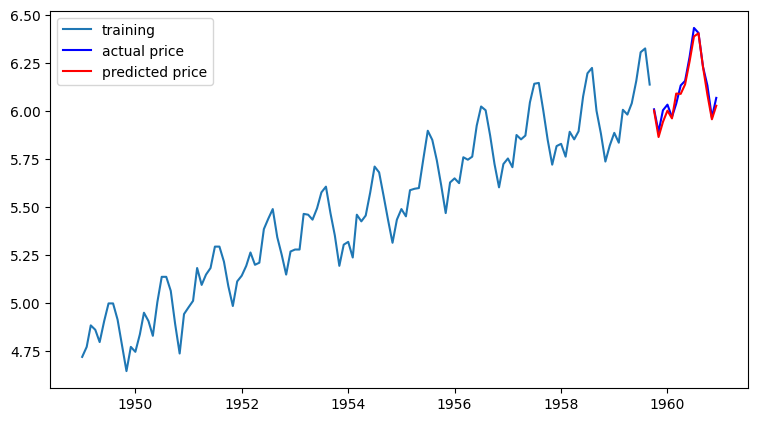

In [46]:
model = ARIMA(train_data, order=(14, 1, 0))  # p값을 14으로 테스트
fitted_m = model.fit() 
fc= fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과

# Plot
plt.figure(figsize=(9,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

In [47]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  231.97320956929948
MAE:  12.424959605677085
RMSE:  15.230666747365314
MAPE: 2.74%
